<a href="https://colab.research.google.com/github/Lorraine254/911-Emergency-calls-EDA/blob/main/Intro_EDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 911 Emergency Calls

911 is an emergency telephone number for the North American Numbering Plan (NANP). Analysing emergency calls dataset and discovering hidden trends and patterns will help in ensuring that the emergency response team is better equipped to deal with emergencies.

Considering road accidents, fire accidents etc, high numbers in specific areas indicate that there is a high demand for ambulance services in those areas. Road accidents in some areas might be due to road conditions which need to be improved. High frequency of emergencies due to respiratory problems might be due to harmful pollutants in the air in that specific area. Association rule mining will thus help in discovering such patterns.

The dataset contains Emergency 911 calls in Montgomery County located in the Commonwealth of Pennsylvania. The attributes chosen include: type of emergency, time stamp, township where the emergency has occurred.

Motivation of choosing this study:

- For the longest time, l have desired to be a paramedic. Hence the reason why l chose to look into this data set on Emergency calls in order to look into ways/ strategies of improving the response time based on emergencies

In [55]:
#loading required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the maximum number of rows to display
# pd.set_option('display.max_rows', None)

In [56]:
df = pd.read_csv('https://media.githubusercontent.com/media/JosephRidge/911/main/911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Data understanding

In [57]:
df.shape

(663522, 9)

Observation made:
- The dataset has about 663,552 observations with 9 columns

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


Insights:

- From the cell above, it can be observed that the data types present in the data set include: numerical(float64) and categorical (object).

- We can also observe presence of missing values in the zip and township column.
- So what next?

  We can go ahead and check the percentage of missing values.

In [59]:
# Descriptive Statistics - Numerical variables
df.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


Insights:

-> The latitude column has the minimum value as 0 and the maximum value as 51.33. A latitude of 0 could indicate a location near the equator.

-> The 'e' column representing emergency has a standard deviation of 0, hence implying that all values are the same(likely value = 1)

So what? Hence we will drop the 'e' column since it is the same all through.


In [60]:
# Dropping the 'e' column
df = df.drop(['e'],axis=1)
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr'], dtype='object')

- The 'e' column was dropped

In [61]:
# Descriptive statistics - Categorical variables
df.describe(include='object')

,desc,title,timeStamp,twp,addr
count,663522,663522,663522,663229,663522
unique,663282,148,640754,68,41292
top,CITY AVE & CARDINAL AVE; LOWER MERION; Statio...,Traffic: VEHICLE ACCIDENT -,2018-10-06 19:26:38,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD
freq,5,148372,9,55490,7285


 Insights:
*   desc -> The most common description is "CITY AVE & CARDINAL AVE; LOWER MERION; Station…", appearing 5 times. This might be due to repeated incidents at the same location.

*  title -> There are 148 unique titles, indicating the dataset is categorized into 148 different types of emergencies (like vehicle accidents, fires, medical emergencies, etc). "Traffic: VEHICLE ACCIDENT -" is the most frequent category, occurring 148,372 times, highlighting that vehicle accidents are a significant portion of the calls.

* twp(township) ->  We have 68 distinct townships where the calls originate. "LOWER MERION" is the most frequent township, with 55,490 calls.

* addr(address) -> The dataset has 41,292 unique addresses.The address "SHANNONDELL DR & SHANNONDELL BLVD" is the most frequent, appearing 7,285 times. This could be a hotspot for emergencies.



## Exploratory Data Analysis(EDA)

- Is an approach to analyzing data set to summarize their main characterists , often using visual methods


 ### Approches of EDA
*   Univariate Analysis
*   Bivariate Analysis
*   Multivariate Analysis

#### Univariate Analysis

- This involves the analysis of one variable at a time.

##### 'Desc' Variable

In [62]:
df['desc'].value_counts()

desc
CITY AVE & CARDINAL AVE;  LOWER MERION; Station 313; 2019-04-30 @ 15:11:01;        5
GREEN ST & E BASIN ST;  NORRISTOWN; Station 308A; 2016-05-10 @ 20:23:26;           4
GERMANTOWN PIKE; WORCESTER; 2017-09-27 @ 17:50:24-Station:STA83;                   4
WALDEN POND WAY & WOODVIEW LN; TOWAMENCIN; 2017-09-27 @ 17:54:55-Station:STA76;    4
THOMAS RD & VILSMEIER RD;  MONTGOMERY; Station 345; 2020-06-16 @ 07:57:56;         3
                                                                                  ..
MIFFLIN DR & SULLIVAN DR;  UPPER GWYNEDD; Station 345B; 2017-07-06 @ 19:42:04;     1
RT422  & AIRPORT RD OVERPASS; LIMERICK; 2017-07-06 @ 19:48:55;                     1
BAYHILL CIR & TURNBERRY DR;  LIMERICK; Station 324A; 2017-07-06 @ 19:59:30;        1
BELVOIR RD & VALLEY RD;  PLYMOUTH; Station 308; 2017-07-06 @ 19:58:48;             1
HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER MERION; 2020-07-29 @ 15:52:46;      1
Name: count, Length: 663282, dtype: int64

 Insight:

 - From the output, notice that the description of the emergency contains data on the 'Station' that was called and also 'time' the emergency call happened.

 - Therefore from this we can create a new feature/column 'Station'. The time is already represented in the timeStamp column.

In [63]:
# Extracting the station number from the 'desc' column
df['station_num'] = df.desc.str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,station_num
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329


Observation made:

- Notice that a new column containining station number has been added.

In [64]:
# Checking the value count of the station num column
df.station_num.value_counts()

station_num
 308A     25346
 329      21895
 313      20325
 381      15949
 345      14504
          ...  
 03RAD        1
              1
:FIRE         1
:56FD         1
:56           1
Name: count, Length: 139, dtype: int64

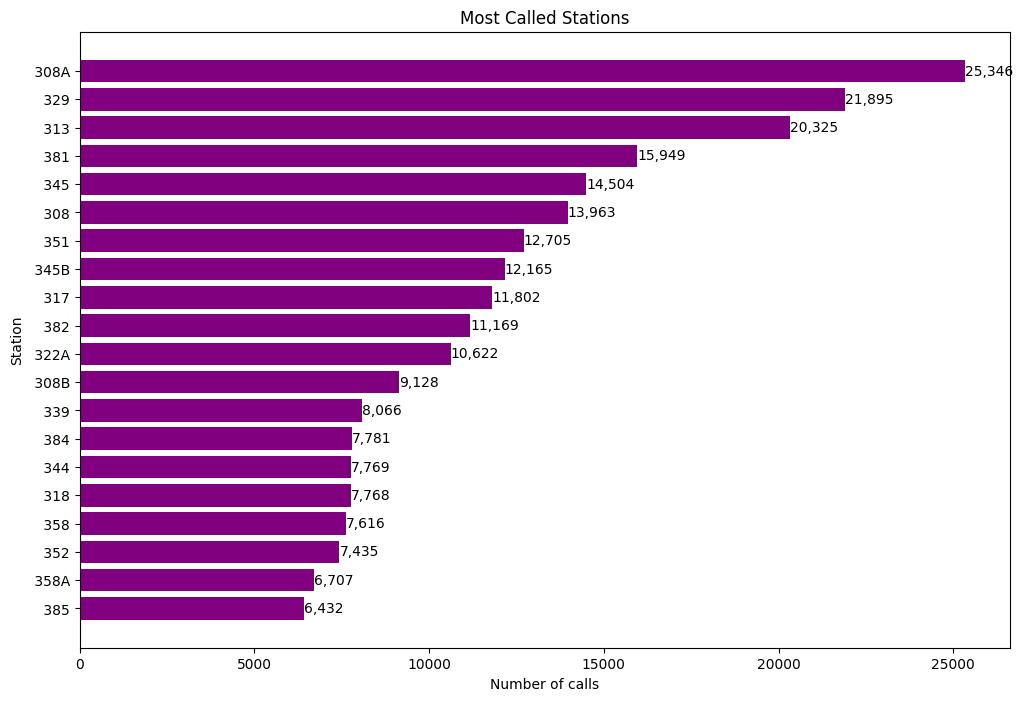

In [65]:
# Visualizing the number of emergency calls based on the top 10 most called stations
station_data = df['station_num'].value_counts()[:20]

plt.figure(figsize=(12, 8))

# Reverse the data for plotting
x = list(station_data.index)
y = list(station_data.values)
x.reverse()
y.reverse()

plt.title("Most Called Stations")
plt.ylabel("Station")
plt.xlabel("Number of calls")

# Create a horizontal bar chart with purple bars
bars = plt.barh(x, y, color='purple')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():,}', va='center', ha='left', color='black')

plt.show()

**Insights:**

First 20 stations were used.

-> Top Stations: The station 308A has the highest call count by a significant margin (25,346), indicating it is the most frequently called station. This could imply it handles a high volume of incidents or is in a high-density area.

Call Volume Distribution:

-> Stations with call counts above 15,000 are relatively common, suggesting that a significant number of calls are concentrated among a few stations.
Stations with call counts between 7,000 and 15,000 appear less frequently, indicating a wider spread of call volumes among less frequently contacted stations.
Station Identification:


-> Alphanumeric station numbers like 308A, 345B, and 358A tend to have higher call counts compared to purely numeric ones. This could suggest a pattern or preference in how stations are identified or prioritized.
Station Performance:


-> **Stations** with call counts on the lower end of the spectrum (around 7,000) might be less critical or less frequently used compared to the higher-end stations.

##### Title Variable

In [66]:
df['title'].value_counts()

title
Traffic: VEHICLE ACCIDENT -    148372
Traffic: DISABLED VEHICLE -     47909
Fire: FIRE ALARM                38336
EMS: FALL VICTIM                34676
EMS: RESPIRATORY EMERGENCY      34248
                                ...  
EMS: DISABLED VEHICLE               1
Fire: PRISONER IN CUSTODY           1
Fire: GENERAL WEAKNESS              1
Fire: SUSPICIOUS                    1
Fire: BARRICADED SUBJECT            1
Name: count, Length: 148, dtype: int64

Observation made:

- The titles column has values described as the reason of the emergency call and a detailed description of the reason.

- Therefore we can create two new columns from the title column: emergency_type and desc_emergency_type

- The emergency_type is in 3 categories: EMS, FIRE, TRAFFIC

- This will facilitate  better analysis

In [67]:
# Creating new features based on the title column
df['emergency_type'] = df.title.str.split(':', expand=True)[0]
df['desc_emergency_type'] = df.title.str.split(':', expand=True)[1].str.replace(' -', '')

In [68]:
# Checking the count of the emergency type
df['emergency_type'].value_counts()

emergency_type
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

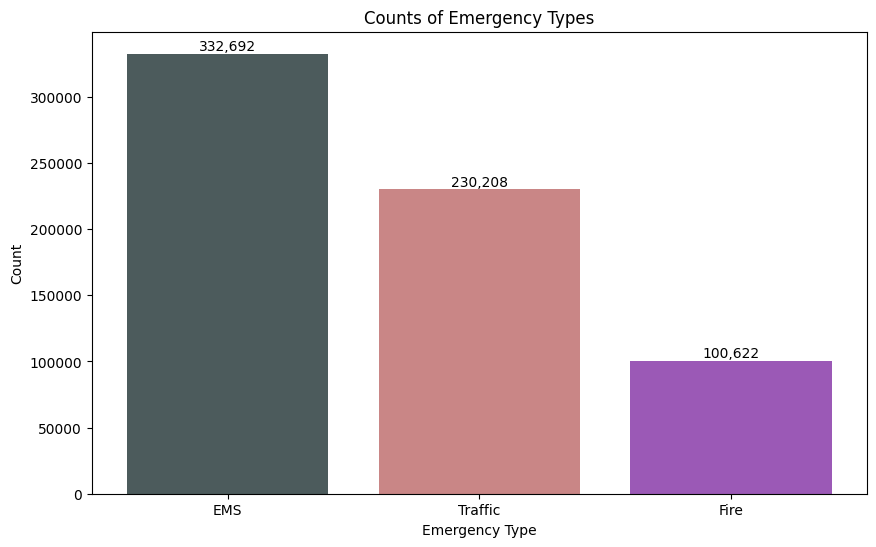

In [69]:
# Data
emergency_types = ['EMS', 'Traffic', 'Fire']
counts = [332692, 230208, 100622]

# Create the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(emergency_types, counts, color=['#4C5B5C', '#C98686', '#9B59B6'])

# Add title and labels
plt.title('Counts of Emergency Types')
plt.xlabel('Emergency Type')
plt.ylabel('Count')

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,}',
             ha='center', va='bottom', fontsize=10, color='black')

# Display the bar graph
plt.show()

Insights:

- EMS(Emergency Medical Services) were the most type of emergency reported.

In [70]:
# Checking the count of the desc_emergency type
df['desc_emergency_type'].value_counts()

desc_emergency_type
 VEHICLE ACCIDENT         184749
 DISABLED VEHICLE          47917
 FIRE ALARM                38452
 FALL VICTIM               34683
 RESPIRATORY EMERGENCY     34250
                           ...  
 ARMED SUBJECT                 2
 ANIMAL COMPLAINT              1
 PRISONER IN CUSTODY           1
 HIT + RUN                     1
 FOOT PATROL                   1
Name: count, Length: 88, dtype: int64

- Since we 88 values we will just visualize the first 10.

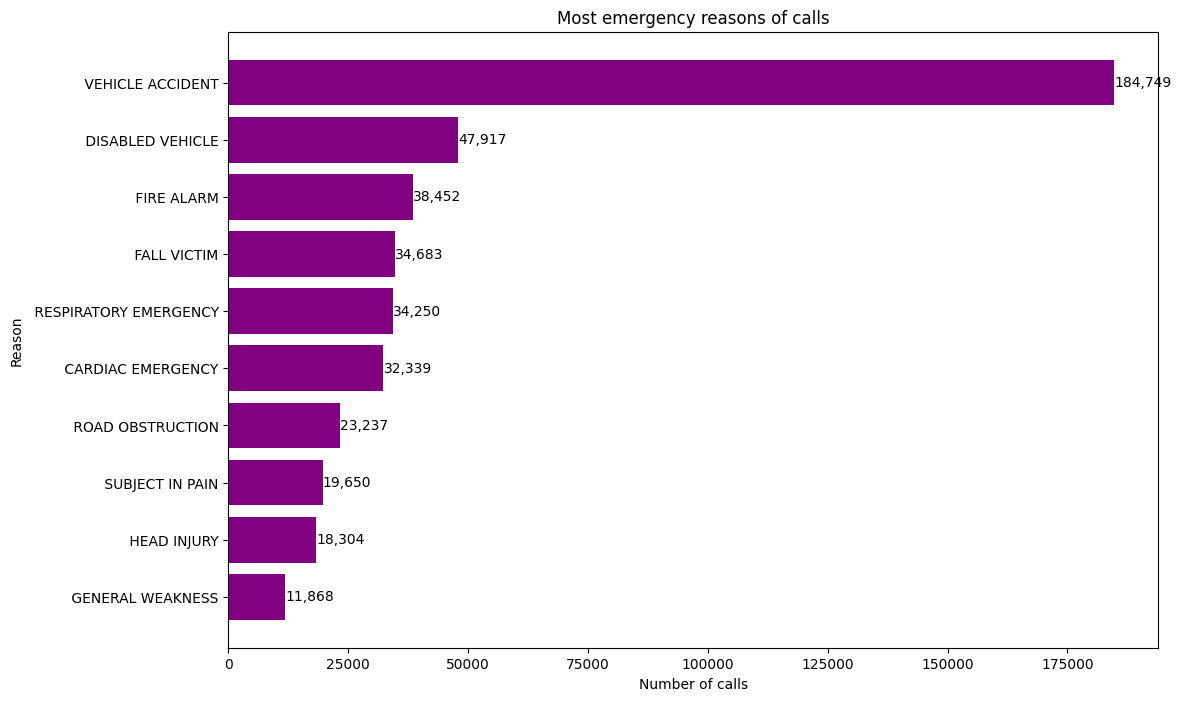

In [71]:
# Horizontal bar graph of the description of emergency types
emergency_desc = df['desc_emergency_type'].value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(emergency_desc.index)
y = list(emergency_desc.values)
x.reverse()
y.reverse()

plt.title("Most emergency reasons of calls")
plt.ylabel("Reason")
plt.xlabel("Number of calls")

# Create a horizontal bar chart with purple bars
bars = plt.barh(x, y, color='purple')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():,}', va='center', ha='left', color='black')

plt.show()

Insight:
- Vehicle-related incidents dominate emergency calls: Accidents and breakdowns account for a significant portion of emergency services' workload. This suggests a potential need for increased road safety measures or improved vehicle maintenance practices.

- Health emergencies are a substantial concern: Respiratory and cardiac emergencies, as well as injuries like falls and head injuries, represent a considerable portion of calls. This highlights the importance of preventive healthcare and emergency medical services.

- Fire safety is a recurring issue: Fire alarms account for a substantial number of calls, indicating the need for fire prevention education and adequate fire safety measures.

Potential Implications

Emergency services might consider allocating more resources to road safety initiatives and vehicle-related emergencies since vehicle related incidents dominate emergency calls.

#### Bivariate Analysis

In [78]:
# Converting timestamp to Datetime
df['timestamp'] = pd.to_datetime(df.timeStamp)

In [82]:
# Extracting the hour,month and day of weeek features
df['Hour'] = df.timestamp.dt.hour
df['Month'] = df.timestamp.dt.month
df['DayOfWeek'] = df.timestamp.dt.weekday
df['df'] = df.timestamp.dt.year

##### Timestamp vs Emergency Type

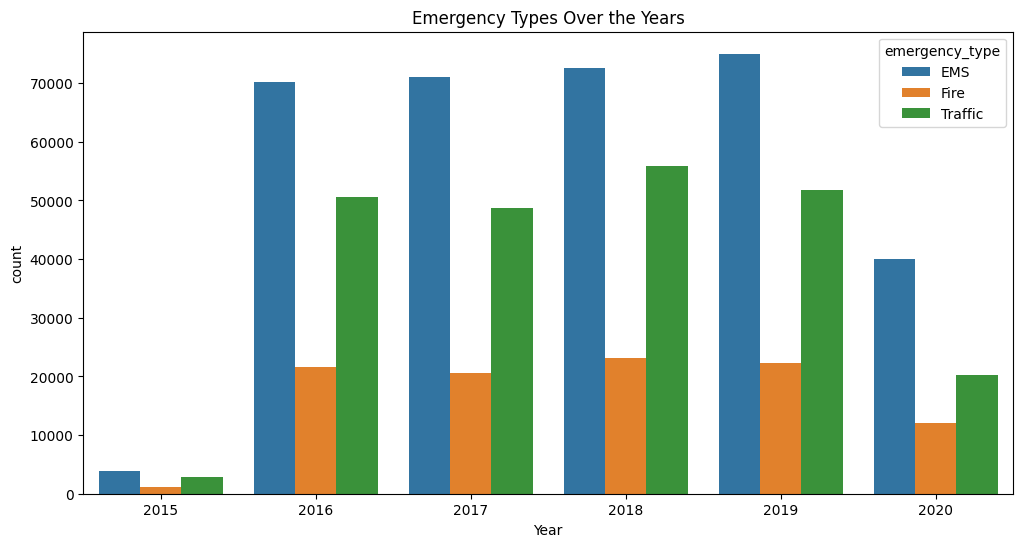

In [90]:
# Creating a Bar graph types of emergency over the yeara
plt.figure(figsize=(12, 6))
sns.countplot(x=df.Year, data=df, hue='emergency_type')

# Adding a title
plt.title('Emergency Types Over the Years')

# Display the plot
plt.show()

Insights:

- The data spans from 2015 to 2020.
- Overall Trend: The number of emergency calls appears to have increased over the years, with a notable peak in 2019.
- EMS Calls: Showed a consistent increase from 2015 to 2019, with a slight decrease in 2020.
- Fire Calls: Remained relatively stable throughout the years with a slight increase in 2019.
- Traffic Calls: Demonstrated a significant increase from 2015 to 2019, followed by a decrease in 2020.

In [91]:
# Python library for geographic coordinates
import folium
from folium.plugins import HeatMap

In [119]:
# Create a Folium map centered on Montgomery  for the heatmap
emergency_map = folium.Map(location=[39.9526, -75.1652], zoom_start=10)

In [120]:
# Getting the first 200 rows fpr easy visualization
data = df.iloc[:200]


In [121]:
# Add points to the map
# Add points to the map with color-coded markers
for _, row in data.iterrows():
    if row["emergency_type"] == "EMS":
        icon = folium.Icon(color="blue", icon="ambulance", prefix="fa")
    elif row["emergency_type"] == "Traffic":
        icon = folium.Icon(color="green", icon="car", prefix="fa")
    elif row["emergency_type"] == "Fire":
        icon = folium.Icon(color="red", icon="fire", prefix="fa")
    else:
        icon = folium.Icon(color="gray", icon="info-sign")  # Default icon for other types

    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"{row['title']}<br>{row['desc']}",
        icon=icon
    ).add_to(emergency_map)


In [122]:
# Display the heatmap map
emergency_map

Insight:

- The map above gives a distribution of the different types of emergencies

#### EMS Heatmap

In [131]:
# Filter the data to include only EMS incidents
ems_data = data[data['emergency_type'] == 'EMS']

# Create a map centered around the general area of the incidents
ems_heat_map = folium.Map(location=[39.9526, -75.1652], zoom_start=8)

# Prepare data for the HeatMap (latitude and longitude points)
heat_data = ems_data[['lat', 'lng']].values.tolist()

# Add the HeatMap to the map
HeatMap(data=heat_data, radius=9).add_to(ems_heat_map)


In [132]:
ems_heat_map

Insight:

-> Norrison Town seems to have the highest EMS related 911 calls.

-> Kindly zoom in to observe the above

#### Traffic Heatmap

In [134]:
# Filter the data to include only EMS incidents
traffic_data = data[data['emergency_type'] == 'Traffic']

# Create a map centered around the general area of the incidents
traffic_heat_map = folium.Map(location=[39.9526, -75.1652], zoom_start=8)

# Prepare data for the HeatMap (latitude and longitude points)
heat_data = traffic_data[['lat', 'lng']].values.tolist()

# Add the HeatMap to the map
HeatMap(data=heat_data, radius=9).add_to(traffic_heat_map)


In [135]:
traffic_heat_map

Insight:

-> King of Prussia has the highest Traffic related 911 calls

#### Fire Heatmap

In [136]:
# Filter the data to include only EMS incidents
fire_data = data[data['emergency_type'] == 'Fire']

# Create a map centered around the general area of the incidents
fire_heat_map = folium.Map(location=[39.9526, -75.1652], zoom_start=8)

# Prepare data for the HeatMap (latitude and longitude points)
heat_data = fire_data[['lat', 'lng']].values.tolist()

# Add the HeatMap to the map
HeatMap(data=heat_data, radius=9).add_to(fire_heat_map)


In [137]:
fire_heat_map

Insight:

- Eastgreenvile, Radnor and Franconia have the highest Traffic related 911 calls